In [121]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [124]:
df_vg.printSchema()

root
 |-- Rank: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: string (nullable = true)
 |-- EU_Sales: string (nullable = true)
 |-- JP_Sales: string (nullable = true)
 |-- Other_Sales: string (nullable = true)
 |-- Global_Sales: string (nullable = true)



In [125]:
df_vg.show(6)

+----+--------------------+--------+----+------------+---------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+---------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports| Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform| Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing| Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports| Nintendo|   15.75|   11.01|    3.28|       2.96|          33|
|   5|Pokemon Red/Pokem...|      GB|1996|Role-Playing| Nintendo|   11.27|    8.89|   10.22|          1|       31.37|
|   6|              Tetris|      GB|1989|      Puzzle| Nintendo|

In [126]:
cat_cols = ['platform','genre','publisher']
num_cols = ['na_sales','eu_sales','jp_sales', 'other_sales', 'global_sales']

In [127]:
df = df_vg.toPandas()

In [128]:
df.columns = map(str.lower, df.columns)

In [129]:
df.set_index('rank', inplace=True)

In [130]:
df=df.drop(df[df.year == 'N/A'].index)

In [131]:
#df = df.drop([0])
df = df.astype({'year':'int'})
df=df.drop(df[df.year == 0].index)

In [132]:
for n in num_cols:
    df[n] = pd.to_numeric(df[n])

In [133]:
df.head()

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [134]:
df.isnull().all()

name            False
platform        False
year            False
genre           False
publisher       False
na_sales        False
eu_sales        False
jp_sales        False
other_sales     False
global_sales    False
dtype: bool

In [135]:
platforms = df[cat_cols[0]].unique()
print("Number of platforms:",len(platforms))
print("Types of platforms:\n",platforms)

Number of platforms: 31
Types of platforms:
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [136]:
genres = df[cat_cols[1]].unique()
print("Number of genres:",len(genres))
print("Genres:\n",genres)

Number of genres: 12
Genres:
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [137]:
publishers = df[cat_cols[2]].unique()
print("Number of publishers:",len(publishers))
print("Publishers:\n",publishers)

Number of publishers: 577
Publishers:
 ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Valve Software' 'ASCII Entertainment' 'Mindscape'
 'Infogrames' 'Unknown' 'Square' 'Valve' 'Activision Value' 'Banpresto'
 'D3Publisher' 'Oxygen I

In [138]:
df[num_cols].describe()

,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,0.265415,0.147554,0.078661,0.048325,0.540232
std,0.821591,0.508766,0.311557,0.189885,1.565732
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [139]:
def cnt_decade(x):
    if x <= 1979:
        return '-79'
    elif x<=1989:
        return '80-89'
    elif x<=1999: 
        return '90-99' 
    elif x<=2009:
        return '00-09' 
    else: 
        return '10-20' 
df['decade'] = df['year'].apply ( lambda x: cnt_decade(x) )


In [140]:
df_pop = df[df.global_sales>0.3]

In [141]:
df_pop

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,decade
rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,00-09
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80-89
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,00-09
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,00-09
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90-99
...,...,...,...,...,...,...,...,...,...,...,...
5817,Disney's Stitch: Experiment 626,PS2,2002,Action,Sony Computer Entertainment,0.15,0.12,0.00,0.04,0.31,00-09
5818,RPG Tsukuru 2,SNES,1996,Role-Playing,ASCII Entertainment,0.00,0.00,0.31,0.00,0.31,90-99
5819,Yuu Yuu Hakusho 2: Kakutou no Sho,SNES,1994,Fighting,Namco Bandai Games,0.00,0.00,0.31,0.00,0.31,90-99


In [142]:
df_pop = df_pop.replace(to_replace=['PS','PS2','PS3','PS4'], value='PlayStation')
df_pop = df_pop.replace(to_replace=['XOne','X360','XB'], value='Xbox station')
df_pop = df_pop.replace(to_replace=['Wii','WiiU','N64', 'SNES', 'NES'], value='Nintendo station')
df_pop = df_pop.replace(to_replace=['GC','GEN','DC', 'SAT','2600', 'SCD'], value='Other stations')
df_pop = df_pop.replace(to_replace=['GB','DS','GBA', '3DS','PSP','PSV','WS',], value='Portable consoles')

In [143]:
platforms = df_pop[cat_cols[0]].unique()
print("Number of platforms:",len(platforms))
print("Types of platforms:\n",platforms)

Number of platforms: 6
Types of platforms:
 ['Nintendo station' 'Portable consoles' 'Xbox station' 'PlayStation' 'PC'
 'Other stations']


In [144]:
genres = df_pop[cat_cols[1]].unique()
print("Number of genres:",len(genres))
print("Genres:\n",genres)

Number of genres: 12
Genres:
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [145]:
publishers = df_pop[cat_cols[2]].unique()
print("Number of publishers:",len(publishers))
print("Publishers:\n",publishers)

Number of publishers: 218
Publishers:
 ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Valve Software' 'ASCII Entertainment' 'Mindscape'
 'Infogrames' 'Unknown' 'Square' 'Valve' 'Activision Value' 'Banpresto'
 'D3Publisher' 'Oxygen I

In [146]:
years = df_pop['year'].unique()
print("Number of years:",len(years))
print("Years:\n",sorted(years))

Number of years: 37
Years:
 [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [147]:
cols = ['name','platform','year','genre','publisher','na_sales','eu_sales' 'jp_sales','other_sales','global_sales']

In [148]:
df_platforms = []
for a in range(len(platforms)):
    for b in range(len(genres)):
        row = [platforms[a],genres[b],sum(df_pop[(df_pop.platform==platforms[a]) & (df_pop.genre==genres[b])]['global_sales'])]
        df_platforms.append(row)


In [149]:
df_platforms=np.array(df_platforms)
df_platforms=pd.DataFrame(data = df_platforms,  
                  index = range(len(df_platforms)),  
                  columns = ['platform', 'genre','gs_sum']) 
df_platforms.gs_sum = pd.to_numeric(df_platforms.gs_sum)

In [150]:
df_platforms.describe()

,gs_sum
count,72.000000
mean,106.697222
std,136.890937
min,0.000000
25%,16.897500
50%,45.985000
75%,160.772500
max,725.990000


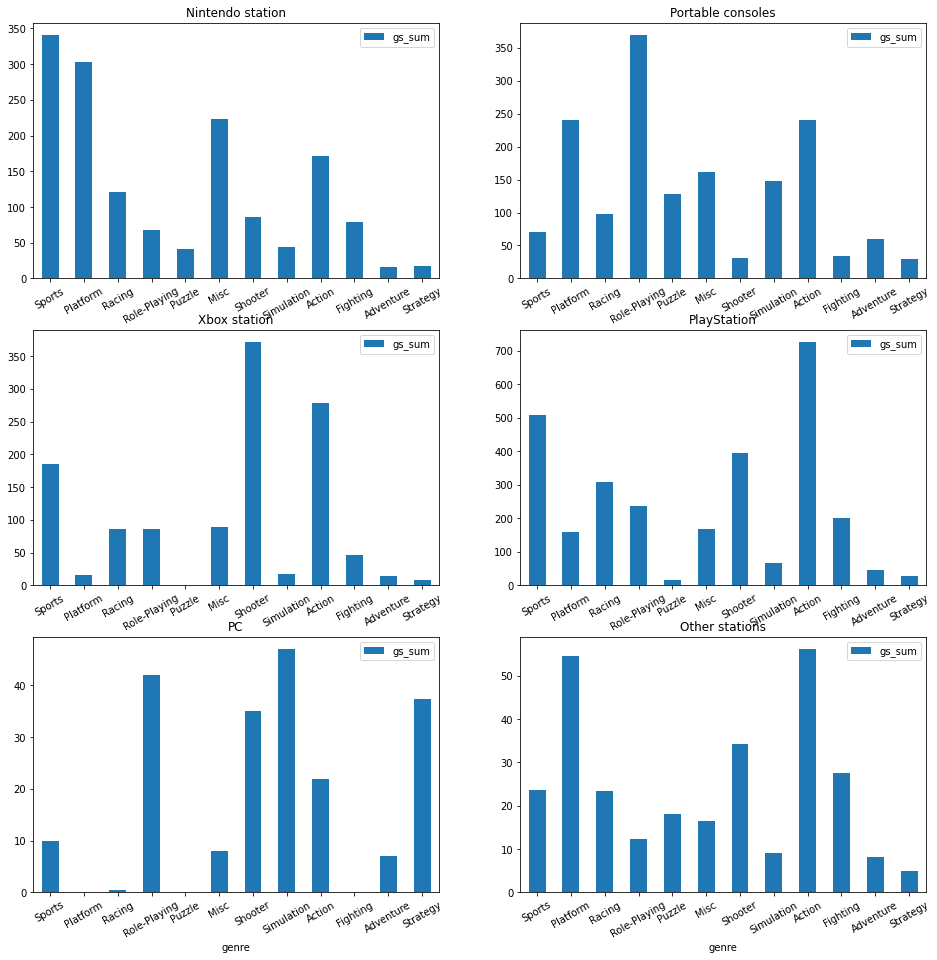

In [151]:
h=3
w=2
fig, axs = plt.subplots(h, w, figsize=(16, 16))
z=0
for i in range(0,h):
    for j in range(0,w):
        df1 = df_platforms[df_platforms.platform==platforms[z]]
        df1.set_index('genre', inplace=True)
        df1.plot.bar(ax=axs[i,j], title=platforms[z], rot=30)
        z+=1
fig.savefig("plt1.jpeg")     
plt.show()

In [152]:
df_genre_reg = df_pop[['genre','na_sales','eu_sales','jp_sales']].groupby(['genre']).sum()

In [153]:
df_genre_reg


,na_sales,eu_sales,jp_sales
genre,,,
Action,746.77,466.21,112.73
Adventure,71.76,48.33,21.34
Fighting,197.58,90.66,65.66
Misc,332.24,190.73,77.76
Platform,413.70,187.81,125.15
Puzzle,100.20,42.79,50.63
Racing,306.28,211.32,51.36
Role-Playing,292.03,172.39,298.00
Shooter,534.06,289.86,30.59


<Axes: title={'center': 'Genre preferences by region'}, xlabel='genre'>

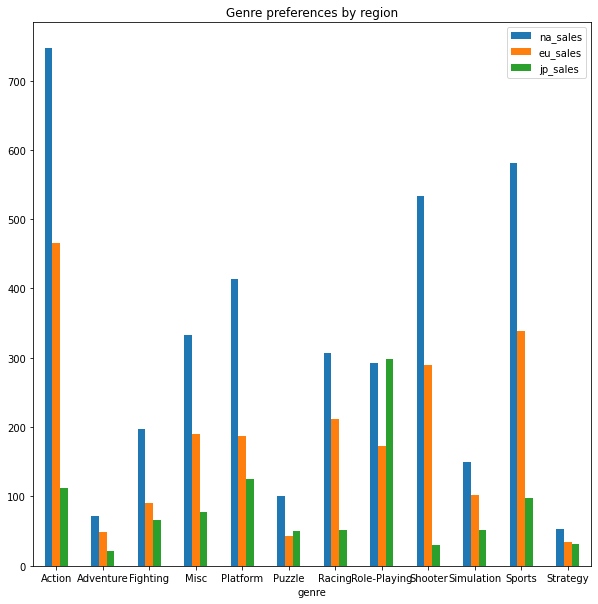

In [154]:
df_genre_reg.plot.bar(figsize=(10,10),title='Genre preferences by region',rot=0)
  

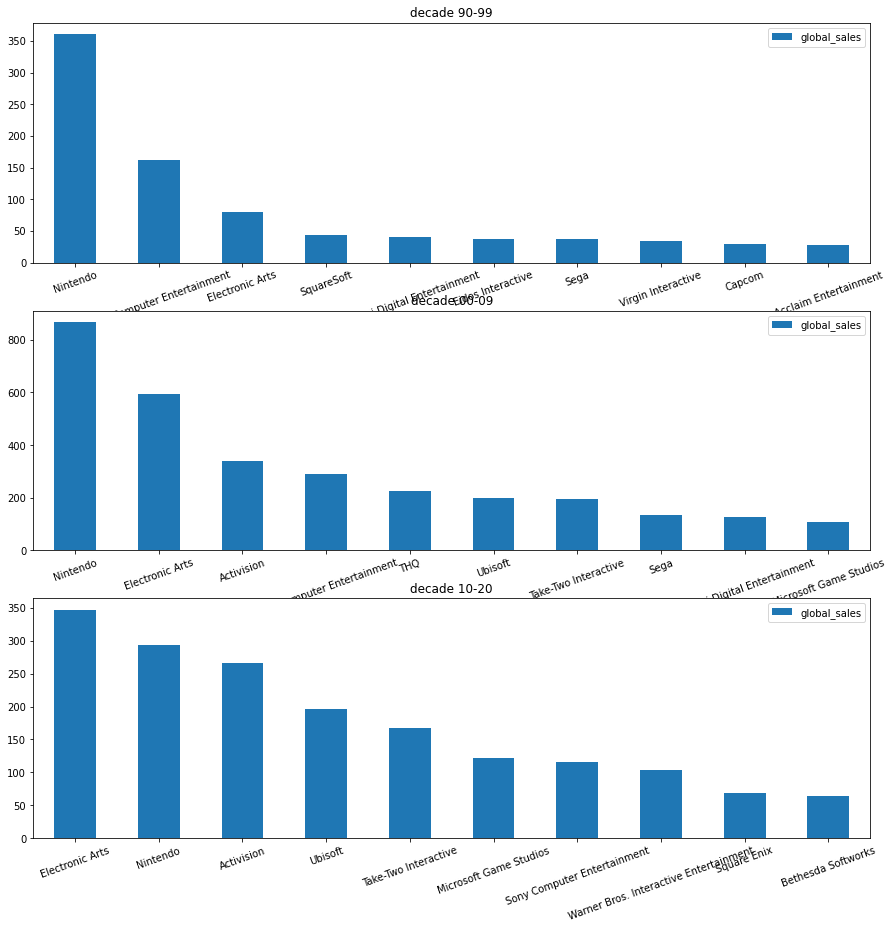

In [155]:
decades = [ '90-99' ,'00-09' ,'10-20']
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
for i in range(len(decades)):
    df1 = df_pop[['publisher','global_sales']][df_pop.decade==decades[i]]
    df2=df1.groupby(['publisher']).sum()
    df3=df2.sort_values(by=['global_sales'], ascending=False)
    df4=df3.head(10)
    df4.plot.bar(ax=axs[i],rot=20, title='decade '+decades[i], xlabel='')
fig.savefig('plt3.jpeg')
plt.show()

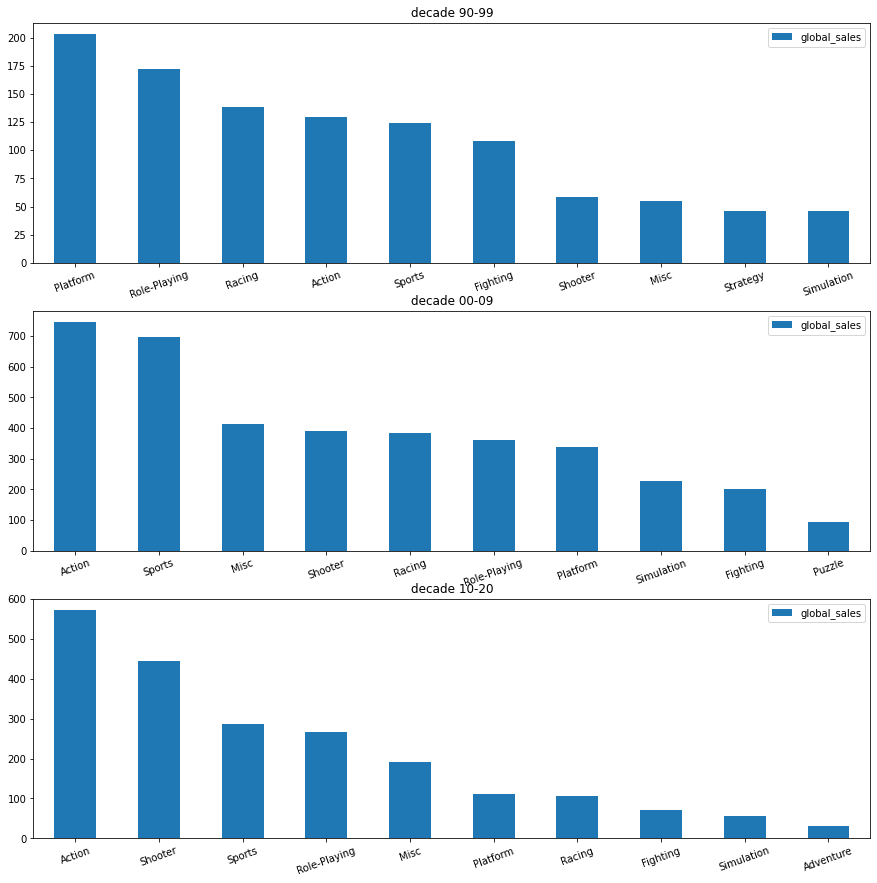

In [156]:
decades = [ '90-99' ,'00-09' ,'10-20']
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
for i in range(len(decades)):
    df1 = df_pop[['genre','global_sales']][df_pop.decade==decades[i]]
    df2=df1.groupby(['genre']).sum()
    df3=df2.sort_values(by=['global_sales'], ascending=False)
    df4=df3.head(10)
    df4.plot.bar(ax=axs[i],rot=20, title='decade '+decades[i], xlabel='')
fig.savefig('plt4.jpeg')
plt.show()